In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

DATA_PATH = '/root/Workspace/DataLake/bidmc_csv'
DATA_PATH2 = '/root/Workspace/Project-RRpo-2ndStudy/dataset/230921'

In [3]:
dataset_fast = np.load(f'{DATA_PATH2}/bidmc-preprocessed_fastRR.npy', allow_pickle=True)
dataset_normal = np.load(f'{DATA_PATH2}/bidmc-preprocessed_normalRR.npy', allow_pickle=True)
dataset_slow = np.load(f'{DATA_PATH2}/bidmc-preprocessed_slowRR.npy', allow_pickle=True)
print(dataset_fast.shape, dataset_normal.shape, dataset_slow.shape)

(26, 2) (22, 2) (2, 2)


In [4]:
sel_fast_id = dataset_fast[16][0]; sel_fast_rr = round(np.mean([dataset_fast[16][1][i,1] for i in range(len(dataset_fast[16][1]))]))
sel_normal_id = dataset_normal[0][0]; sel_normal_rr = round(np.mean([dataset_normal[0][1][i,1] for i in range(len(dataset_normal[0][1]))]))
sel_slow_id = dataset_slow[1][0]; sel_slow_rr = round(np.mean([dataset_slow[1][1][i,1] for i in range(len(dataset_slow[1][1]))]))

In [5]:
fast_pleth = pd.read_csv(f'{DATA_PATH}/{sel_fast_id}_Signals.csv', usecols=['Time [s]', ' PLETH'])[' PLETH'].values
normal_pleth = pd.read_csv(f'{DATA_PATH}/{sel_normal_id}_Signals.csv', usecols=['Time [s]', ' PLETH'])[' PLETH'].values
slow_pleth = pd.read_csv(f'{DATA_PATH}/{sel_slow_id}_Signals.csv', usecols=['Time [s]', ' PLETH'])[' PLETH'].values
print(fast_pleth.shape, normal_pleth.shape, slow_pleth.shape)

(60001,) (60001,) (60001,)


In [6]:
# pleth_fast = pd.read_csv(f'{DATA_PATH}/{sel_fast_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
# pleth_normal = pd.read_csv(f'{DATA_PATH}/{sel_normal_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
# pleth_slow = pd.read_csv(f'{DATA_PATH}/{sel_slow_id}/pleth.csv', header=None, names=['sid', 'offset', 'pleth']).pleth.values
# print(pleth_fast.shape, pleth_normal.shape, pleth_slow.shape)

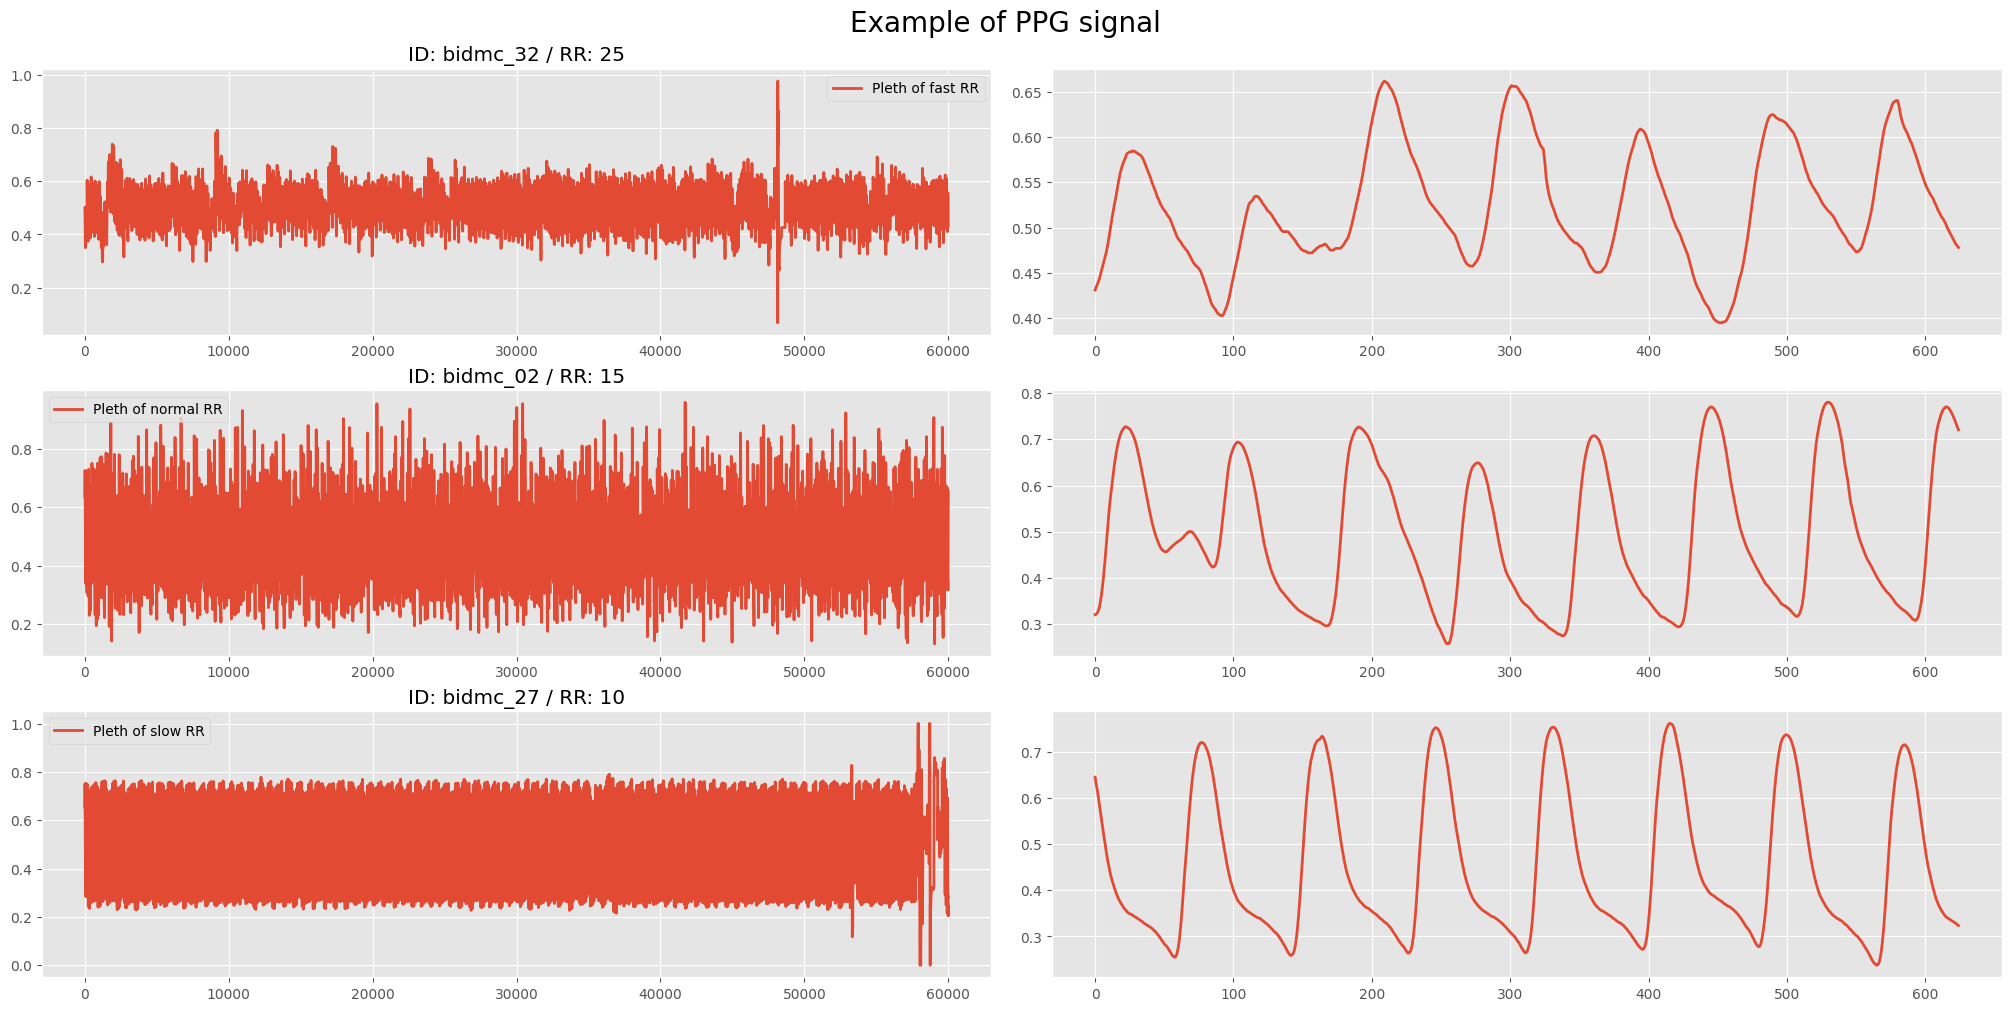

In [9]:
i = 100
fig, axs = plt.subplots(3,2,figsize=(20,10), constrained_layout=True)
axs[0,0].plot(fast_pleth, linewidth=2, label='Pleth of fast RR')
axs[0,1].plot(fast_pleth[125*i:125*(i+5)], linewidth=2, label='Pleth of fast RR')
axs[0,0].set_title(f'ID: {sel_fast_id} / RR: {sel_fast_rr}')
axs[1,0].plot(normal_pleth, linewidth=2, label='Pleth of normal RR')
axs[1,1].plot(normal_pleth[125*i:125*(i+5)], linewidth=2, label='Pleth of normal RR')
axs[1,0].set_title(f'ID: {sel_normal_id} / RR: {sel_normal_rr}')
axs[2,0].plot(slow_pleth, linewidth=2, label='Pleth of slow RR')
axs[2,1].plot(slow_pleth[125*i:125*(i+5)], linewidth=2, label='Pleth of slow RR')
axs[2,0].set_title(f'ID: {sel_slow_id} / RR: {sel_slow_rr}')
# axs[2,0].set_xlabel('offset')
for i in range(3): axs[i,0].legend()
plt.suptitle('Example of PPG signal', fontsize=20)
plt.show()